In [6]:
import cnn_limits.notebook
import imp
imp.reload(cnn_limits.notebook)

from cnn_limits.notebook import ExperimentResults, el, plot_df

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import collections
import re

In [8]:
import re

relevant_line = re.compile(r'^.*N_inducing=([0-9]*).*sigy=([0-9.]*).*accuracy=([0-9.]*).*cv_accuracy=([0-9.]*).*$')


experiments = [
    "huygens:/scratch/ag919/logs/mask_sparse_classify/1",
    "huygens:/scratch/ag919/logs/mask_sparse_classify/2",
    "huygens:/scratch/ag919/logs/mask_sparse_classify/5",
    "stroustrup:/scratch/ag919/logs/mask_sparse_classify/1",
    "stroustrup:/scratch/ag919/logs/mask_sparse_classify/2",
    "stroustrup:/scratch/ag919/logs/mask_sparse_classify/3",
    "stroustrup:/scratch/ag919/logs/mask_sparse_classify/5",
    "stroustrup:/scratch/ag919/logs/mask_sparse_classify/6",
    "laplace:/tmp/ag919/logs/mask_sparse_classify/1",
    "laplace:/tmp/ag919/logs/mask_sparse_classify/2",
    "laplace:/tmp/ag919/logs/mask_sparse_classify/3",
    "laplace:/tmp/ag919/logs/mask_sparse_classify/8",
    "poisson:/scratch/ag919/logs/mask_sparse_classify/3",
    "poisson:/scratch/ag919/logs/mask_sparse_classify/4",
    "poisson:/scratch/ag919/logs/mask_sparse_classify/6",
    "cartwright:/scratch/ag919/logs/sparse_classify/102",
    "cartwright:/scratch/ag919/logs/sparse_classify/90",
    "cartwright:/scratch/ag919/logs/mask_sparse_classify/43",
]


In [32]:
df = pd.DataFrame()
df_test = pd.DataFrame()

for e in experiments:
    with ExperimentResults(e, "").open("cout.txt", "r") as f:
        for l in f.readlines():
            match = relevant_line.match(l)
            if match is not None:
                n_inducing, sigy, accuracy, cv_accuracy = match.groups()
                df.loc[int(n_inducing), e] = float(cv_accuracy)
                df_test.loc[int(n_inducing), e] = float(accuracy)

In [45]:
df.loc[1024, :].sort_values()

laplace:/tmp/ag919/logs/mask_sparse_classify/1            0.54418
laplace:/tmp/ag919/logs/mask_sparse_classify/2            0.54646
cartwright:/scratch/ag919/logs/mask_sparse_classify/43    0.55018
stroustrup:/scratch/ag919/logs/mask_sparse_classify/2     0.55280
stroustrup:/scratch/ag919/logs/mask_sparse_classify/1     0.55312
huygens:/scratch/ag919/logs/mask_sparse_classify/2        0.55578
poisson:/scratch/ag919/logs/mask_sparse_classify/6        0.55852
poisson:/scratch/ag919/logs/mask_sparse_classify/4        0.55872
huygens:/scratch/ag919/logs/mask_sparse_classify/1        0.56252
poisson:/scratch/ag919/logs/mask_sparse_classify/3        0.56722
huygens:/scratch/ag919/logs/mask_sparse_classify/5        0.56932
cartwright:/scratch/ag919/logs/sparse_classify/102        0.57978
laplace:/tmp/ag919/logs/mask_sparse_classify/8            0.58772
stroustrup:/scratch/ag919/logs/mask_sparse_classify/3         NaN
stroustrup:/scratch/ag919/logs/mask_sparse_classify/6         NaN
laplace:/t

In [49]:
df[['huygens:/scratch/ag919/logs/mask_sparse_classify/5', 'cartwright:/scratch/ag919/logs/sparse_classify/102', 'laplace:/tmp/ag919/logs/mask_sparse_classify/8']]

,huygens:/scratch/ag919/logs/mask_sparse_classify/5,cartwright:/scratch/ag919/logs/sparse_classify/102,laplace:/tmp/ag919/logs/mask_sparse_classify/8
4,0.17886,0.18612,0.18686
8,0.23520,0.24370,0.24280
16,0.30440,0.31598,0.28290
32,0.34536,0.37390,0.34894
64,0.38800,0.41738,0.40412
128,0.44048,0.45618,0.44984
256,0.48662,0.49496,0.50316
512,0.52738,0.53752,0.54798
1024,0.56932,0.57978,0.58772
1536,NaN,NaN,0.60834


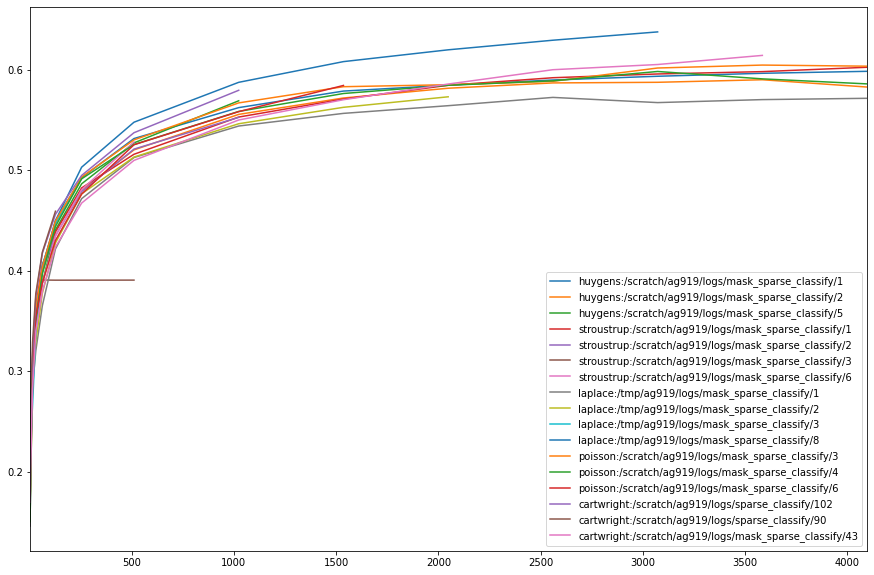

In [15]:
df.plot(figsize=(15, 10))

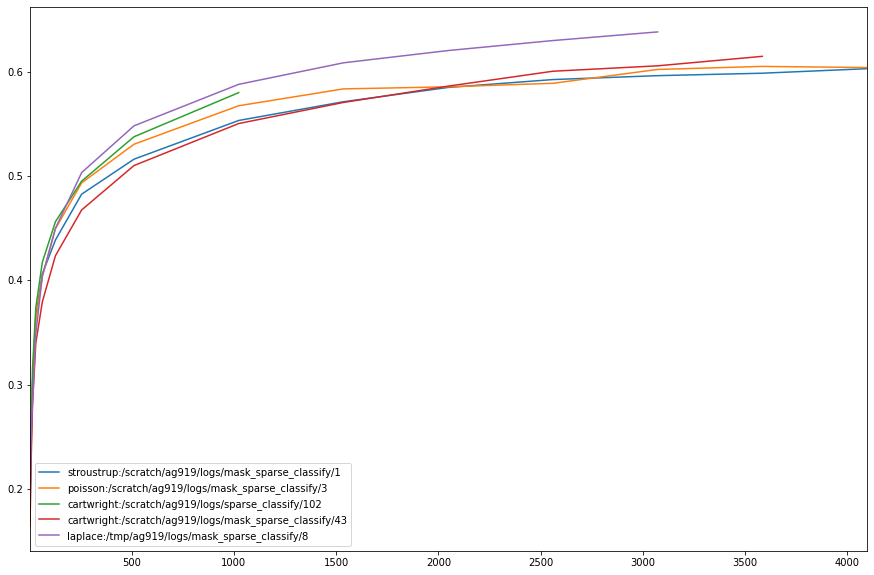

In [27]:
df_test[df.max().sort_values()[-5:].index].plot(figsize=(15, 10))

In [43]:
df[df.max().sort_values()[-5:].index]

,stroustrup:/scratch/ag919/logs/mask_sparse_classify/1,poisson:/scratch/ag919/logs/mask_sparse_classify/3,cartwright:/scratch/ag919/logs/sparse_classify/102,cartwright:/scratch/ag919/logs/mask_sparse_classify/43,laplace:/tmp/ag919/logs/mask_sparse_classify/8
4,0.19140,0.16464,0.18612,0.16938,0.18686
8,0.23980,0.22406,0.24370,0.21760,0.24280
16,0.30186,0.30306,0.31598,0.28110,0.28290
32,0.36488,0.36264,0.37390,0.33984,0.34894
64,0.40616,0.40376,0.41738,0.37946,0.40412
128,0.43864,0.44944,0.45618,0.42360,0.44984
256,0.48252,0.49334,0.49496,0.46740,0.50316
512,0.51604,0.53036,0.53752,0.50994,0.54798
1024,0.55312,0.56722,0.57978,0.55018,0.58772
1536,0.57106,0.58336,NaN,0.57038,0.60834


In [36]:
df_test.columns = ['test ' + c for c in df_test.columns]

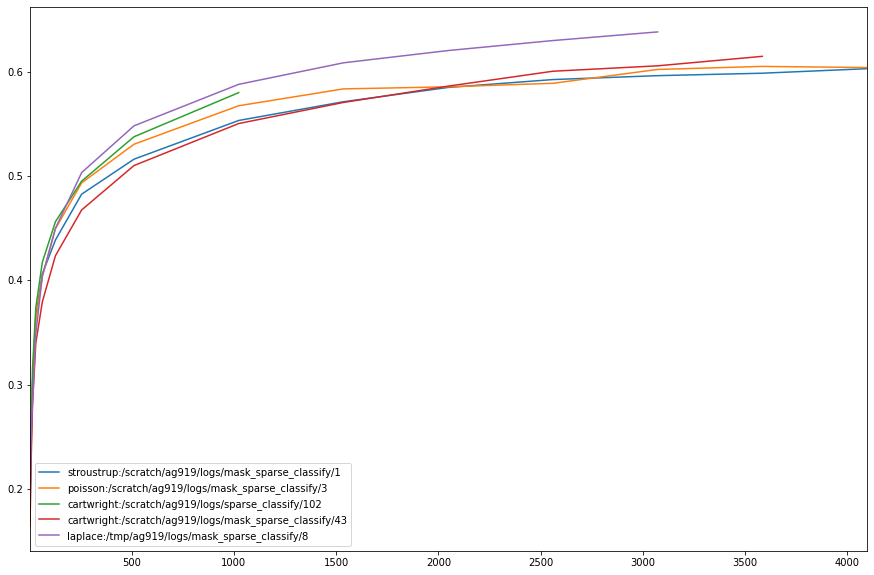

In [42]:
pd.concat([
    df[df.max().sort_values()[-5:].index],
  #  df_test[['test ' + c for c in df.max().sort_values()[-5:].index]],
], axis=1).plot(figsize=(15, 10))

In [40]:
df_test[['test ' + c for c in df.max().sort_values()[-5:].index]]

,test stroustrup:/scratch/ag919/logs/mask_sparse_classify/1,test poisson:/scratch/ag919/logs/mask_sparse_classify/3,test cartwright:/scratch/ag919/logs/sparse_classify/102,test cartwright:/scratch/ag919/logs/mask_sparse_classify/43,test laplace:/tmp/ag919/logs/mask_sparse_classify/8
4,0.1605,0.1400,0.1830,0.1686,0.1907
8,0.2123,0.1895,0.2443,0.2134,0.2398
16,0.2415,0.2419,0.3231,0.2769,0.2877
32,0.2746,0.2660,0.3741,0.3399,0.3545
64,0.2962,0.2955,0.4201,0.3850,0.4083
128,0.3221,0.3316,0.4613,0.4281,0.4567
256,0.3537,0.3738,0.4998,0.4746,0.5094
512,0.3896,0.4043,0.5423,0.5130,0.5468
1024,0.4309,0.4468,0.5819,0.5588,0.5925
1536,0.4567,0.4632,NaN,0.5775,0.6157


In [31]:
df[df.max().sort_values()[-5:].index]

,stroustrup:/scratch/ag919/logs/mask_sparse_classify/1,poisson:/scratch/ag919/logs/mask_sparse_classify/3,cartwright:/scratch/ag919/logs/sparse_classify/102,cartwright:/scratch/ag919/logs/mask_sparse_classify/43,laplace:/tmp/ag919/logs/mask_sparse_classify/8
4,0.19140,0.16464,0.18612,0.16938,0.18686
8,0.23980,0.22406,0.24370,0.21760,0.24280
16,0.30186,0.30306,0.31598,0.28110,0.28290
32,0.36488,0.36264,0.37390,0.33984,0.34894
64,0.40616,0.40376,0.41738,0.37946,0.40412
128,0.43864,0.44944,0.45618,0.42360,0.44984
256,0.48252,0.49334,0.49496,0.46740,0.50316
512,0.51604,0.53036,0.53752,0.50994,0.54798
1024,0.55312,0.56722,0.57978,0.55018,0.58772
1536,0.57106,0.58336,NaN,0.57038,0.60834
